<a href="https://colab.research.google.com/github/lamtrinh259/crypto_forecasting/blob/ni_branch/notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/crypto_data/btcusd.csv')
df.head(5)

,time,open,close,high,low,volume
0,1364774820000,93.25,93.30,93.30,93.25,93.300000
1,1364774880000,100.00,100.00,100.00,100.00,93.300000
2,1364774940000,93.30,93.30,93.30,93.30,33.676862
3,1364775060000,93.35,93.47,93.47,93.35,20.000000
4,1364775120000,93.47,93.47,93.47,93.47,2.021627


In [4]:
df.time = pd.to_datetime(df.time, unit='ms')

In [5]:
df.tail(5)

,time,open,close,high,low,volume
3750533,2022-02-26 10:48:00,39000.000000,39012.0,39012.0,39000.000000,0.168502
3750534,2022-02-26 10:49:00,39008.000000,38976.0,39008.0,38971.410904,1.341707
3750535,2022-02-26 10:50:00,38971.755285,39029.0,39029.0,38967.949394,6.989503
3750536,2022-02-26 10:51:00,39027.000000,39092.0,39100.0,39027.000000,4.822631
3750537,2022-02-26 10:52:00,39092.000000,39069.0,39101.0,39067.572686,7.333250


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [7]:
df_mini = df.iloc[::10000]
df_mini.head(5)

,time,open,close,high,low,volume
0,2013-04-01 00:07:00,93.250,93.30,93.300,93.25,93.300000
10000,2013-04-19 23:54:00,118.819,117.90,118.819,117.90,80.001316
20000,2013-05-06 20:21:00,114.200,116.90,116.900,114.20,110.000000
30000,2013-05-31 10:21:00,127.880,127.88,127.880,127.88,0.119000
40000,2013-06-22 19:13:00,100.390,100.08,100.390,100.08,0.053576


In [8]:
fig = go.Figure(data=[go.Candlestick(x=df_mini['time'],
                open=df_mini['open'],
                high=df_mini['high'],
                low=df_mini['low'],
                close=df_mini['close'])])

In [9]:
fig.show()

In [10]:
df_mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 3750000
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    376 non-null    datetime64[ns]
 1   open    376 non-null    float64       
 2   close   376 non-null    float64       
 3   high    376 non-null    float64       
 4   low     376 non-null    float64       
 5   volume  376 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 17.8 KB


In [11]:
## preprocessing

from sklearn.preprocessing import Normalizer, MinMaxScaler



In [12]:
## using a MinMaxScaler
df_mini.reset_index(inplace=True)
df_mini = df_mini.drop(columns='index')
df_mini

,time,open,close,high,low,volume
0,2013-04-01 00:07:00,93.250000,93.30,93.300,93.250000,93.300000
1,2013-04-19 23:54:00,118.819000,117.90,118.819,117.900000,80.001316
2,2013-05-06 20:21:00,114.200000,116.90,116.900,114.200000,110.000000
3,2013-05-31 10:21:00,127.880000,127.88,127.880,127.880000,0.119000
4,2013-06-22 19:13:00,100.390000,100.08,100.390,100.080000,0.053576
...,...,...,...,...,...,...
371,2022-01-29 06:48:00,37690.427256,37722.00,37723.000,37689.932332,0.434815
372,2022-02-05 05:48:00,41618.000000,41657.00,41658.000,41618.000000,7.823411
373,2022-02-12 04:30:00,42416.000000,42429.00,42438.000,42416.000000,1.450080
374,2022-02-19 03:12:00,40252.308640,40259.00,40259.000,40252.308640,0.059979


In [13]:
df_mini_X = df_mini.drop(columns='time')

In [14]:
tf1 = MinMaxScaler().fit_transform(df_mini_X)

In [15]:
X_mini = pd.DataFrame(tf1).join(df_mini['time'],)
X_mini.rename(columns={0:'open',1:'close',2:'high',3:'low',4:'volume'},inplace =True)
X_mini

,open,close,high,low,volume,time
0,0.000015,0.000015,0.000015,0.000015,0.082916,2013-04-01 00:07:00
1,0.000416,0.000402,0.000416,0.000402,0.071098,2013-04-19 23:54:00
2,0.000344,0.000386,0.000386,0.000344,0.097758,2013-05-06 20:21:00
3,0.000559,0.000559,0.000559,0.000559,0.000106,2013-05-31 10:21:00
4,0.000127,0.000122,0.000127,0.000122,0.000047,2013-06-22 19:13:00
...,...,...,...,...,...,...
371,0.590806,0.591274,0.591290,0.590798,0.000386,2022-01-29 06:48:00
372,0.652523,0.653105,0.653120,0.652523,0.006953,2022-02-05 05:48:00
373,0.665062,0.665235,0.665377,0.665062,0.001289,2022-02-12 04:30:00
374,0.631063,0.631138,0.631138,0.631063,0.000053,2022-02-19 03:12:00


In [16]:
fig2 = go.Figure(data=[go.Candlestick(x=X_mini['time'],
                open=X_mini['open'],
                high=X_mini['high'],
                low=X_mini['low'],
                close=X_mini['close'])])
fig2.show()

In [17]:
from statsmodels.tsa.stattools import adfuller
# for column in 
print('p-value: ', adfuller(tf1[:,0])[1])

p-value:  0.9100220962487822


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [18]:
##using a Log scaler
import numpy as np

In [19]:
df_linearized = np.log(df_mini_X)
X_linearized = df_linearized.join(df_mini.time)
X_linearized

,open,close,high,low,volume,time
0,4.535284,4.535820,4.535820,4.535284,4.535820,2013-04-01 00:07:00
1,4.777601,4.769837,4.777601,4.769837,4.382043,2013-04-19 23:54:00
2,4.737951,4.761319,4.761319,4.737951,4.700480,2013-05-06 20:21:00
3,4.851092,4.851092,4.851092,4.851092,-2.128632,2013-05-31 10:21:00
4,4.609063,4.605970,4.609063,4.605970,-2.926654,2013-06-22 19:13:00
...,...,...,...,...,...,...
371,10.537161,10.537999,10.538025,10.537148,-0.832835,2022-01-29 06:48:00
372,10.636288,10.637225,10.637249,10.636288,2.057121,2022-02-05 05:48:00
373,10.655281,10.655587,10.655799,10.655281,0.371618,2022-02-12 04:30:00
374,10.602923,10.603089,10.603089,10.602923,-2.813761,2022-02-19 03:12:00


In [20]:
print('p-value: ', adfuller(df_linearized.iloc[:,0])[1])

p-value:  0.44342622075972793


In [21]:
fig3 = go.Figure(data=[go.Candlestick(x=X_linearized['time'],
                open=X_linearized['open'],
                high=X_linearized['high'],
                low=X_linearized['low'],
                close=X_linearized['close'])])
fig3.show()

In [22]:
## linear difference 
X_linearized.set_index('time',inplace=True)
X_linearized


,open,close,high,low,volume
time,,,,,
2013-04-01 00:07:00,4.535284,4.535820,4.535820,4.535284,4.535820
2013-04-19 23:54:00,4.777601,4.769837,4.777601,4.769837,4.382043
2013-05-06 20:21:00,4.737951,4.761319,4.761319,4.737951,4.700480
2013-05-31 10:21:00,4.851092,4.851092,4.851092,4.851092,-2.128632
2013-06-22 19:13:00,4.609063,4.605970,4.609063,4.605970,-2.926654
...,...,...,...,...,...
2022-01-29 06:48:00,10.537161,10.537999,10.538025,10.537148,-0.832835
2022-02-05 05:48:00,10.636288,10.637225,10.637249,10.636288,2.057121
2022-02-12 04:30:00,10.655281,10.655587,10.655799,10.655281,0.371618


In [23]:
X_linearized_diff = X_linearized.diff()
X_linearized_diff

,open,close,high,low,volume
time,,,,,
2013-04-01 00:07:00,NaN,NaN,NaN,NaN,NaN
2013-04-19 23:54:00,0.242317,0.234017,0.241781,0.234553,-0.153777
2013-05-06 20:21:00,-0.039650,-0.008518,-0.016282,-0.031886,0.318437
2013-05-31 10:21:00,0.113141,0.089773,0.089773,0.113141,-6.829112
2013-06-22 19:13:00,-0.242030,-0.245122,-0.242030,-0.245122,-0.798022
...,...,...,...,...,...
2022-01-29 06:48:00,0.055282,0.053162,0.051819,0.056037,-4.200888
2022-02-05 05:48:00,0.099127,0.099226,0.099223,0.099140,2.889956
2022-02-12 04:30:00,0.018993,0.018363,0.018551,0.018993,-1.685502


In [24]:
print('p-value: ', adfuller(X_linearized_diff.iloc[1:,1])[1])

p-value:  7.006552981809444e-29


In [25]:
fig4 = go.Figure(data=[go.Candlestick(x=X_linearized_diff.index,
                open=X_linearized_diff['open'],
                high=X_linearized_diff['high'],
                low=X_linearized_diff['low'],
                close=X_linearized_diff['close'])])
fig4.show()

In [26]:
##proposed pipeline

from sklearn.base import TransformerMixin, BaseEstimator

class LogTransformer(TransformerMixin,BaseEstimator):
  def __init__(self):
    pass
    
  def fit(self,X,y=None):
    return self

  def transform(self,X,y=None):
    X_linearized = np.log(X)
    return X_linearized
    if y:
      y_l = np.log(y)
      return y_l
    
  def inverse_transform(self, X, y=None):
    return np.exp(X)
    if y:
      y_ex = np.exp(y)
      return y_ex

In [27]:
class DifferenceTransformer(TransformerMixin,BaseEstimator):
  def __init__(self):
    pass

  def fit(self,X,y=None):
    return self

  def transform(self,X,y=None):
    X_linearized = np.log(X)
    if y:
      y_l = np.log(y)
    return X_linearized, y_l
    
  def inverse_transform(self, X, y=None):
    if y:
      y_ex = np.exp(y)
    return np.exp(X),y_ex

In [5]:
np.exp(1)

2.718281828459045

In [46]:
from fbprophet import Prophet
ph = Prophet(seasonality_mode='multiplicative', interval_width=0.95,daily_seasonality=True)

In [47]:
df_fb = df [['time','close']].copy()
df_fb = df_fb.rename(columns = {'time':'ds','close':'y'})
df_fb.head(4)

,ds,y
0,2013-04-01 00:07:00,93.30
1,2013-04-01 00:08:00,100.00
2,2013-04-01 00:09:00,93.30
3,2013-04-01 00:11:00,93.47


In [48]:
l = len(df_fb)
train = df_fb.iloc[-5000:-1000]
test = df_fb.iloc[-1000:]

In [49]:
ph.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


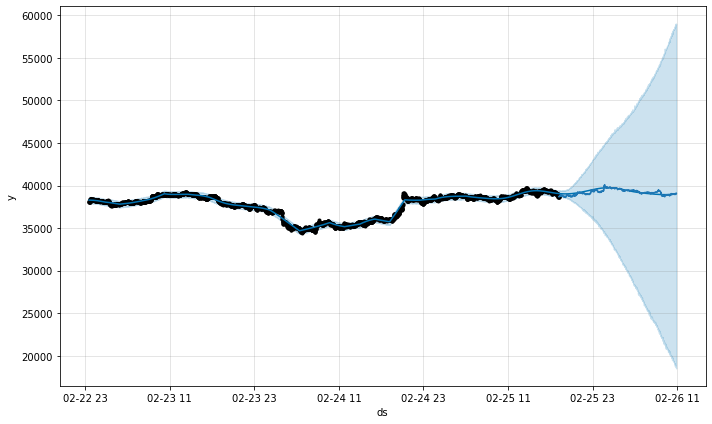

In [56]:
future=ph.make_future_dataframe(periods=1000,freq='min')
forecast1=ph.predict(future)
figure = ph.plot(forecast1)
figure.show()
plt.plot(test['ds'],test['y'],'r')